# Analysis and Modelling of Agersens Data

### Importing the required libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import math
import numpy as np
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report

import xgboost as xg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU

### Reading data from the data provided using pandas

In [2]:
agersens_df = pd.read_csv('/data/shared/debdeep_guha/agersens_data/location.csv')

In [3]:
agersens_df.head()

,ID,target,latitude,longitude,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,Location_1,1,-37.706060,145.126555,6,1.5,9.0,7.33,43.98,10.995,2,12,3.0,14.66,999.62,17.48
1,Location_2,1,-37.706120,145.126457,11,0.8,8.8,3.52,38.72,2.816,3,33,2.4,10.56,1000.17,22.59
2,Location_3,1,-37.706122,145.126435,12,0.7,8.4,2.93,35.16,2.051,3,36,2.1,8.79,986.20,21.66
3,Location_4,1,-37.706123,145.126427,13,0.7,9.1,2.54,33.02,1.778,4,52,2.8,10.16,1011.47,13.72
4,Location_5,1,-37.706123,145.126423,13,0.7,9.1,2.29,29.77,1.603,4,52,2.8,9.16,995.29,9.19


In [4]:
# checking the length of the dataset
len(agersens_df)

4106295

#### Checking the data

In [5]:
agersens_df.describe()

,target,latitude,longitude,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
count,4.106295e+06,3.877678e+06,4.106295e+06,4.106295e+06,4.106295e+06,3.101952e+06,4.106295e+06,4.073446e+06,4.106295e+06,4.106295e+06,4.106295e+06,4.106295e+06,4.098033e+06,4.106295e+06,4.106295e+06
mean,9.919292e-01,-3.770612e+01,1.451264e+02,1.508246e+01,7.535538e-01,1.031854e+01,1.866368e+00,1.962658e+01,2.419367e+00,2.868143e+02,5.175781e+03,1.716860e+02,1.582932e+02,9.999998e+02,1.999491e+01
std,8.947426e-02,8.390644e-05,1.281560e-04,4.389738e+00,4.288497e-01,2.702694e+00,6.515952e+00,3.618669e+01,3.508119e+01,2.959106e+02,5.502739e+03,1.779611e+02,1.550168e+02,1.000328e+01,4.998535e+00
min,0.000000e+00,-3.773290e+01,1.450800e+02,3.000000e+00,4.000000e-01,3.000000e+00,4.800000e-01,3.480000e+00,1.960000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.514000e+02,-6.250000e+00
25%,1.000000e+00,-3.770613e+01,1.451264e+02,1.100000e+01,6.000000e-01,9.500000e+00,5.000000e-01,9.000000e+00,3.000000e-01,1.000000e+01,1.100000e+02,9.500000e+00,2.493000e+01,9.932400e+02,1.662000e+01
50%,1.000000e+00,-3.770612e+01,1.451264e+02,1.600000e+01,7.000000e-01,1.050000e+01,5.800000e-01,1.080000e+01,3.500000e-01,1.850000e+02,3.222000e+03,1.092000e+02,1.020800e+02,1.000000e+03,1.999000e+01
75%,1.000000e+00,-3.770611e+01,1.451264e+02,1.900000e+01,8.000000e-01,1.100000e+01,2.050000e+00,2.250000e+01,1.792000e+00,5.420000e+02,9.690000e+03,3.150000e+02,2.800000e+02,1.006750e+03,2.337000e+01
max,1.000000e+00,-3.762418e+01,1.452322e+02,6.300000e+01,1.117000e+02,1.408000e+03,6.549600e+02,9.410550e+03,2.402215e+04,9.010000e+02,2.157600e+04,3.449600e+04,4.812372e+04,1.049120e+03,4.540000e+01


In [6]:
agersens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106295 entries, 0 to 4106294
Data columns (total 16 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ID         object 
 1   target     int64  
 2   latitude   float64
 3   longitude  float64
 4   f1         int64  
 5   f2         float64
 6   f3         float64
 7   f4         float64
 8   f5         float64
 9   f6         float64
 10  f7         int64  
 11  f8         int64  
 12  f9         float64
 13  f10        float64
 14  f11        float64
 15  f12        float64
dtypes: float64(11), int64(4), object(1)
memory usage: 501.3+ MB


No categorical column present.

In [7]:
agersens_df.isnull().sum()

ID                 0
target             0
latitude      228617
longitude          0
f1                 0
f2                 0
f3           1004343
f4                 0
f5             32849
f6                 0
f7                 0
f8                 0
f9                 0
f10             8262
f11                0
f12                0
dtype: int64

Nulls in `latitude`, `f3`, `f5`, `f10`. 

Removing rows where `latitude` is null. As cannot impute values for geographical coordinates and we will only be losing 246 rows for `Non-Spurious` data, which is less

In [8]:
agersens_df['target'].unique()

array([1, 0])

In [9]:
agersens_df[agersens_df['latitude'].isnull()]

,ID,target,latitude,longitude,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
35,Location_36,1,NaN,145.126405,15,0.6,9.0,1.09,16.35,0.654,20,300,12.0,21.80,987.39,13.24
36,Location_37,1,NaN,145.126405,15,0.6,9.0,1.07,16.05,0.642,20,300,12.0,21.40,1024.25,21.07
37,Location_38,1,NaN,145.126405,15,0.6,9.0,1.06,15.90,0.636,21,315,12.6,22.26,999.15,24.53
38,Location_39,1,NaN,145.126405,15,0.6,9.0,1.05,15.75,0.630,21,315,12.6,22.05,1012.19,18.90
39,Location_40,1,NaN,145.126405,15,0.6,9.0,1.04,15.60,0.624,22,330,13.2,22.88,979.04,21.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105830,Location_4105831,1,NaN,145.126300,8,1.2,NaN,4.83,38.64,5.796,2,16,2.4,9.66,1006.41,23.38
4105831,Location_4105832,1,NaN,145.126300,11,0.9,9.9,4.10,45.10,3.690,3,33,2.7,12.30,998.45,20.13
4106170,Location_4106171,1,NaN,145.126400,15,0.7,10.5,0.97,14.55,0.679,60,900,42.0,58.20,978.37,22.41
4106171,Location_4106172,1,NaN,145.126400,15,0.7,10.5,0.97,14.55,0.679,61,915,42.7,59.17,1000.23,20.01


In [10]:
len(agersens_df) - len(agersens_df[agersens_df['latitude'].isnull()])

3877678

#### Only 0.8% of the data is `Non-Spurious`

The data is highly imbalanced, we have to be careful in removing records

In [11]:
agersens_df['target'].value_counts()

1    4073154
0      33141
Name: target, dtype: int64

In [12]:
agersens_df['target'].value_counts(normalize=True)

1    0.991929
0    0.008071
Name: target, dtype: float64

#### Checking the number of rows for `spurious` and `non-spurious` data for each column with nulls

We will be losing at most `252` rows for `non-spurious` data if we remove nulls for columns `f5`, `f10` and `latitude`.

If I remove rows where there are nulls for `f3`, then I will be losing out on a lot of data, so before removing any rows for the columns mentioned above, I am imputing the null values in `f3` with the mean value of the column. Not using moving average as there are many consecutive rows with null values in `f3`

In [13]:
agersens_df[agersens_df['latitude'].isnull()]['target'].value_counts()

1    228371
0       246
Name: target, dtype: int64

In [14]:
agersens_df[agersens_df['f10'].isnull()]

,ID,target,latitude,longitude,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
466,Location_467,1,-37.706142,145.126367,19,0.5,9.5,0.49,9.31,0.245,237,4503,118.5,NaN,1014.53,23.52
467,Location_468,1,-37.706142,145.126367,19,0.5,9.5,0.49,9.31,0.245,237,4503,118.5,NaN,1002.20,20.86
2254,Location_2255,1,NaN,145.126400,20,0.5,NaN,0.49,9.80,0.245,237,4740,118.5,NaN,1000.35,24.56
2255,Location_2256,1,NaN,145.126400,20,0.5,NaN,0.49,9.80,0.245,237,4740,118.5,NaN,1009.39,16.03
3191,Location_3192,1,-37.706140,145.126400,19,0.5,9.5,0.50,9.50,0.250,706,13414,353.0,NaN,990.21,26.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103832,Location_4103833,1,-37.706100,145.126400,11,0.8,8.8,2.70,29.70,2.160,5,55,4.0,NaN,1007.90,19.08
4104191,Location_4104192,1,-37.706110,145.126400,11,0.8,8.8,2.70,29.70,2.160,5,55,4.0,NaN,1004.23,27.11
4104439,Location_4104440,1,NaN,145.126400,10,0.9,9.0,2.70,27.00,2.430,5,50,4.5,NaN,994.90,22.40
4104637,Location_4104638,1,-37.706110,145.126400,9,1.0,9.0,2.70,24.30,2.700,5,45,5.0,NaN,1011.56,13.58


In [15]:
agersens_df[agersens_df['f10'].isnull()]['target'].value_counts()

1    8253
0       9
Name: target, dtype: int64

In [16]:
agersens_df['f10'].min()

0.0

In [17]:
agersens_df['f10'].max()

48123.72

In [18]:
agersens_df[agersens_df['f5'].isnull()]['target'].value_counts()

1    32842
0        7
Name: target, dtype: int64

In [19]:
agersens_df['f5'].min()

3.48

In [20]:
agersens_df['f5'].max()

9410.55

In [21]:
agersens_df[agersens_df['f3'].isnull()]['target'].value_counts()

1    1000028
0       4315
Name: target, dtype: int64

In [22]:
agersens_df['f3'].mean()

10.318543098023438

In [23]:
agersens_df['f3'].min()

3.0

In [24]:
agersens_df['f3'].max()

1408.0

In [25]:
agersens_df[220:280]

,ID,target,latitude,longitude,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
220,Location_221,1,-37.706127,145.126332,17,0.6,NaN,0.49,8.33,0.294,112,1904,67.2,54.88,1006.31,15.73
221,Location_222,1,-37.706127,145.126332,17,0.6,NaN,0.49,8.33,0.294,113,1921,67.8,55.37,990.06,15.77
222,Location_223,1,-37.706128,145.126332,17,0.6,NaN,0.49,8.33,0.294,113,1921,67.8,55.37,1002.14,27.94
223,Location_224,1,-37.706128,145.126332,17,0.6,NaN,0.49,8.33,0.294,114,1938,68.4,55.86,999.26,14.61
224,Location_225,1,-37.706128,145.126333,17,0.6,NaN,0.49,8.33,0.294,114,1938,68.4,55.86,1005.81,19.05
225,Location_226,1,-37.706128,145.126333,17,0.6,NaN,0.49,8.33,0.294,115,1955,69.0,56.35,997.28,15.38
226,Location_227,1,-37.706128,145.126333,17,0.6,NaN,0.49,8.33,0.294,115,1955,69.0,56.35,986.31,17.19
227,Location_228,1,-37.706130,145.126335,17,0.6,NaN,0.49,8.33,0.294,116,1972,69.6,56.84,987.53,14.36
228,Location_229,1,-37.706130,145.126335,17,0.6,NaN,0.49,8.33,0.294,116,1972,69.6,56.84,994.40,22.65
229,Location_230,1,-37.706130,145.126335,17,0.6,NaN,0.49,8.33,0.294,117,1989,70.2,57.33,1008.65,18.48


In [26]:
agersens_df[agersens_df['f3'].isnull()]

,ID,target,latitude,longitude,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
40,Location_41,1,NaN,145.126405,16,0.6,NaN,1.03,16.48,0.618,22,352,13.2,22.66,1004.52,25.89
41,Location_42,1,NaN,145.126405,16,0.6,NaN,1.02,16.32,0.612,23,368,13.8,23.46,993.64,20.45
42,Location_43,1,NaN,145.126403,16,0.6,NaN,1.01,16.16,0.606,23,368,13.8,23.23,995.04,20.57
43,Location_44,1,NaN,145.126403,17,0.6,NaN,1.00,17.00,0.600,24,408,14.4,24.00,999.48,14.07
44,Location_45,1,NaN,145.126403,16,0.6,NaN,0.99,15.84,0.594,24,384,14.4,23.76,993.87,18.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106255,Location_4106256,1,-37.70602,145.126500,12,0.8,NaN,3.38,40.56,2.704,5,60,4.0,16.90,1023.66,19.25
4106256,Location_4106257,1,-37.70602,145.126400,12,0.8,NaN,3.12,37.44,2.496,6,72,4.8,18.72,1000.49,25.76
4106257,Location_4106258,1,-37.70603,145.126400,12,0.8,NaN,2.86,34.32,2.288,7,84,5.6,20.02,1010.24,19.26
4106258,Location_4106259,1,-37.70604,145.126400,12,0.8,NaN,2.62,31.44,2.096,7,84,5.6,18.34,996.45,26.15


#### Imputing missing values for `f3` with the mean value

In [27]:
agersens_df['f3'] = agersens_df['f3'].fillna(agersens_df['f3'].mean())

In [28]:
agersens_df[agersens_df['f3'].isnull()]

,ID,target,latitude,longitude,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12


In [29]:
agersens_df.isnull().sum()

ID                0
target            0
latitude     228617
longitude         0
f1                0
f2                0
f3                0
f4                0
f5            32849
f6                0
f7                0
f8                0
f9                0
f10            8262
f11               0
f12               0
dtype: int64

In [30]:
len(agersens_df)

4106295

#### Removing rows where null value is present in any column

In [31]:
agersens_df = agersens_df.dropna(axis=0, how="any")

In [32]:
agersens_df.isnull().sum()

ID           0
target       0
latitude     0
longitude    0
f1           0
f2           0
f3           0
f4           0
f5           0
f6           0
f7           0
f8           0
f9           0
f10          0
f11          0
f12          0
dtype: int64

In [33]:
len(agersens_df)

3839172

In [34]:
agersens_df['target'].value_counts()

1    3806293
0      32879
Name: target, dtype: int64

#### Checking the distribution of the feature columns and also if any outliers are present

In [35]:
agersens_df.columns

Index(['ID', 'target', 'latitude', 'longitude', 'f1', 'f2', 'f3', 'f4', 'f5',
       'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12'],
      dtype='object')

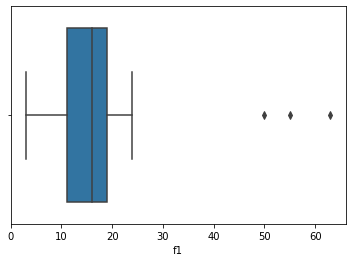

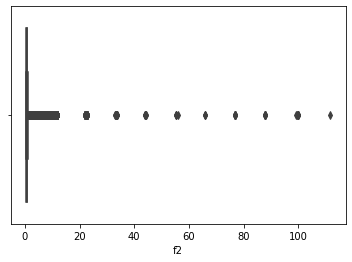

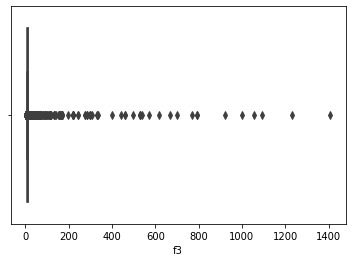

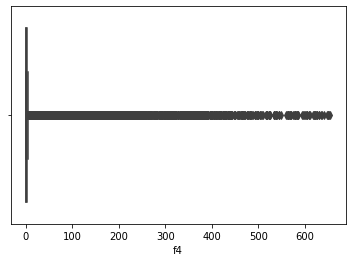

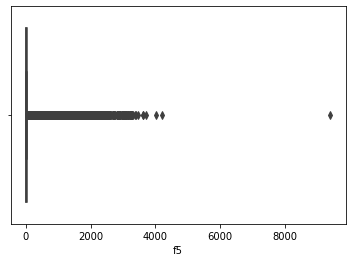

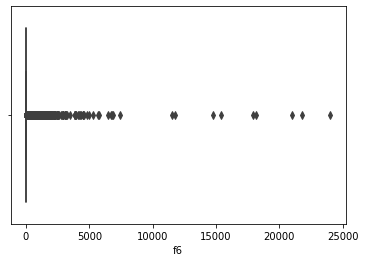

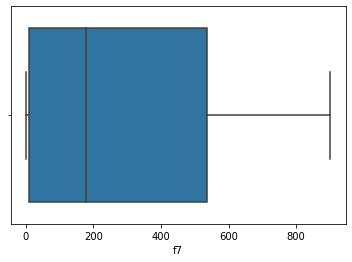

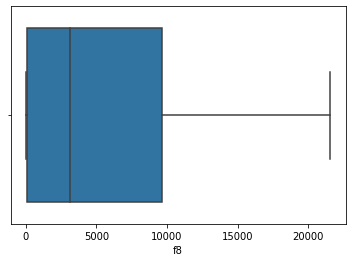

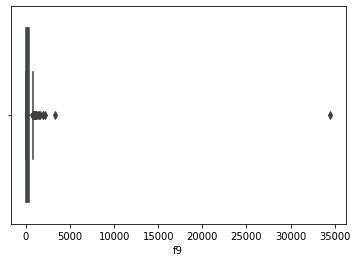

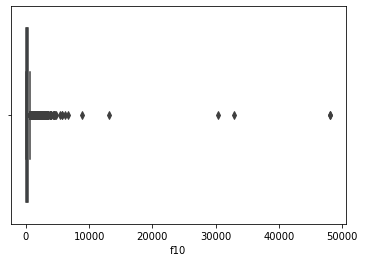

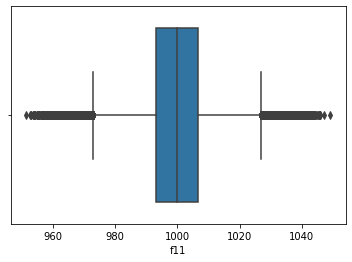

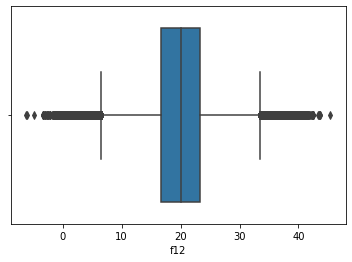

In [36]:
feature_cols = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12']

for cols in feature_cols:
    plt.figure()
    sns.boxplot(x=agersens_df[cols])


/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



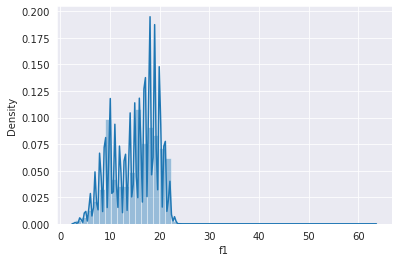

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



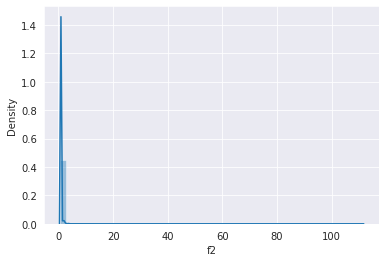

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



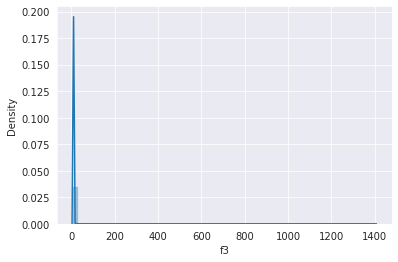

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



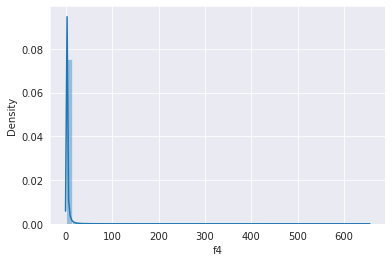

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



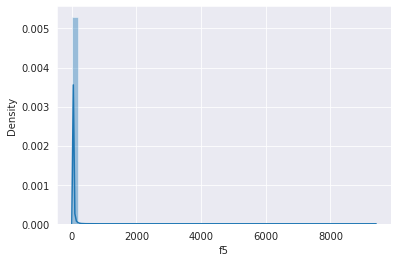

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



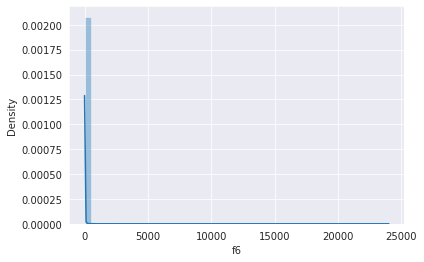

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



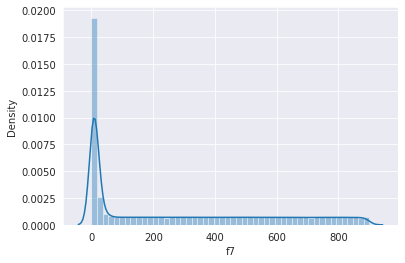

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



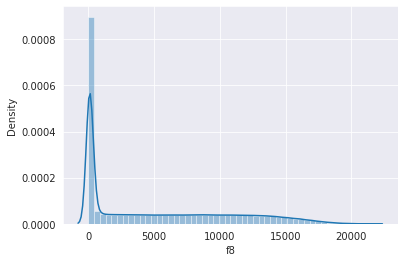

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



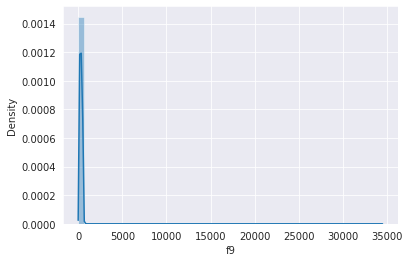

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



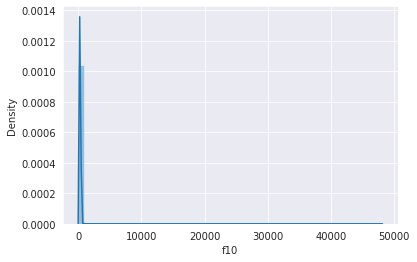

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



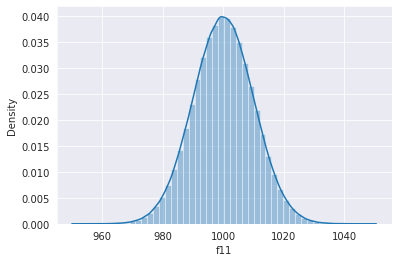

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



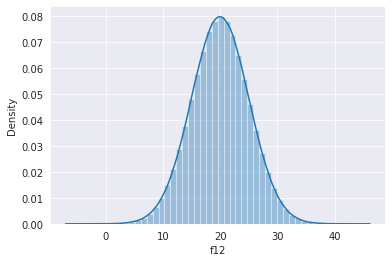

In [37]:
for cols in feature_cols:
    sns.set_style('darkgrid')
    sns.distplot(agersens_df[cols])

    plt.show()

There seems to be outliers present in most columns, so before removing any have to check again for the number of `non-spurious` data present in the dataset. Again have to be careful before removing a lot of `non-spurious` records.

### Checking the number of rows for each column beyond a threshold value using z-score

In [38]:
# checking the number of records that will be removed if stdev of 3 is selected
agersens_df[(np.abs(stats.zscore(agersens_df['f1'])) > 3)]

,ID,target,latitude,longitude,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
938482,Location_938483,1,-37.70607,145.1264,63,1.5,94.5,6.82,429.66,10.23,2,126,3.0,13.64,1008.71,33.21
2028702,Location_2028703,1,-37.70616,145.1265,55,1.0,55.0,10.65,585.75,10.65,3,165,3.0,31.95,1007.97,10.57
2536235,Location_2536236,1,-37.70622,145.1262,50,1.2,60.0,11.50,575.00,13.80,2,100,2.4,23.00,1001.17,11.86


In [39]:
# checking the number of records that will be removed if stdev of 3 is selected
agersens_df[(np.abs(stats.zscore(agersens_df['f2'])) > 4)]

,ID,target,latitude,longitude,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
39376,Location_39377,1,-37.70622,145.1263,5,3.3,16.5,19.21,96.05,63.393,2,10,6.6,38.42,1003.23,20.63
41935,Location_41936,1,-37.70612,145.1264,16,88.0,1408.0,0.50,8.00,44.000,392,6272,34496.0,196.00,1003.11,32.26
75115,Location_75116,1,-37.70623,145.1264,6,3.0,18.0,23.77,142.62,71.310,2,12,6.0,47.54,1005.59,13.98
76895,Location_76896,1,-37.70610,145.1264,5,2.5,12.5,21.62,108.10,54.050,2,10,5.0,43.24,1005.06,14.51
78680,Location_78681,1,-37.70614,145.1264,6,2.9,17.4,8.07,48.42,23.403,2,12,5.8,16.14,1015.22,26.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105766,Location_4105767,0,-37.70601,145.1271,6,3.4,20.4,15.87,95.22,53.958,12,72,40.8,190.44,1005.81,26.31
4105768,Location_4105769,0,-37.70601,145.1271,6,3.4,20.4,15.76,94.56,53.584,13,78,44.2,204.88,987.86,17.54
4105914,Location_4105915,0,-37.70591,145.1262,5,3.5,17.5,8.20,41.00,28.700,2,10,7.0,16.40,1018.99,13.47
4105938,Location_4105939,1,-37.70600,145.1265,5,2.5,12.5,4.71,23.55,11.775,4,20,10.0,18.84,1014.43,22.68


In [40]:
len(agersens_df[(np.abs(stats.zscore(agersens_df['f7'])) > 3)])

0

In [41]:
agersens_df[(np.abs(stats.zscore(agersens_df['f2'])) > 7)]['target'].value_counts()

1    2751
0    2209
Name: target, dtype: int64

In [42]:
agersens_df[(np.abs(stats.zscore(agersens_df['f2'])) > 7)]['target'].value_counts()[0]

2209

#### Checking for the number of rows for each feature column beyond standard deviation 3, 4 and 5

In [43]:
feature_cols = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12']

feat_zscore_df = pd.DataFrame(
    {'col_name': feature_cols
    })

In [44]:
for i in [3,4,5]:
    
    len_sd_gt_dict = {}
    val_1_sd_gt_dict = {}
    val_0_sd_gt_dict = {}
    
    len_sd_gt = 'len_sd_gt_'+str(i)
    val_1_sd_gt = 'val_1_sd_gt_'+str(i)
    val_0_sd_gt = 'val_0_sd_gt_'+str(i)
    
    for cols in feature_cols:

        len_sd = len(agersens_df[(np.abs(stats.zscore(agersens_df[cols])) > i)])
        len_sd_gt_dict[cols] = len_sd
        
        if len_sd != 0:
            val_1 = agersens_df[(np.abs(stats.zscore(agersens_df[cols])) > i)]['target'].value_counts()[1]

            val_1_sd_gt_dict[cols] = val_1

            if len_sd != val_1:

                val_0_sd_gt_dict[cols] = agersens_df[(np.abs(stats.zscore(agersens_df[cols])) > i)]['target'].value_counts()[0]
            else:
                val_0_sd_gt_dict[cols] = 0
        else:
            val_1_sd_gt_dict[cols] = 0
            val_0_sd_gt_dict[cols] = 0
        
    len_sd_gt_df = pd.DataFrame(len_sd_gt_dict.items(), columns=['col_name', len_sd_gt])
    val_1_sd_gt_df = pd.DataFrame(val_1_sd_gt_dict.items(), columns=['col_name', val_1_sd_gt])
    val_0_sd_gt_df = pd.DataFrame(val_0_sd_gt_dict.items(), columns=['col_name', val_0_sd_gt])
    
    feat_zscore_df = pd.merge(feat_zscore_df, len_sd_gt_df, on='col_name')
    feat_zscore_df = pd.merge(feat_zscore_df, val_1_sd_gt_df, on='col_name')
    feat_zscore_df = pd.merge(feat_zscore_df, val_0_sd_gt_df, on='col_name')

In [45]:
feat_zscore_df

,col_name,len_sd_gt_3,val_1_sd_gt_3,val_0_sd_gt_3,len_sd_gt_4,val_1_sd_gt_4,val_0_sd_gt_4,len_sd_gt_5,val_1_sd_gt_5,val_0_sd_gt_5
0,f1,3,3,0,3,3,0,3,3,0
1,f2,32572,23305,9267,18436,12193,6243,10492,6471,4021
2,f3,7343,4588,2755,4259,2423,1836,2765,1501,1264
3,f4,21341,9444,11897,13860,5273,8587,9820,3362,6458
4,f5,22694,10489,12205,14310,5593,8717,9783,3379,6404
5,f6,6991,2427,4564,4942,1602,3340,3785,1175,2610
6,f7,0,0,0,0,0,0,0,0,0
7,f8,0,0,0,0,0,0,0,0,0
8,f9,3497,3484,13,112,101,11,16,8,8
9,f10,5251,4442,809,2260,1674,586,1018,586,432


Based on the above dataframe, I will be keeping records less than 3rd standard deviation from columns: `f1`, `f9`, `f11` and `f12`

Will not be removing records where there are outliers for columns `f2`, `f3`, `f4`, `f5`, `f6` and `f10` as we will miss out on a lot more records for `Non-Spurious` data

In [46]:
upd_agersens_df = agersens_df.copy()

In [47]:
# keeping records which lie within the 3rd standard deviation using z-score
upd_agersens_df = upd_agersens_df[(np.abs(stats.zscore(upd_agersens_df['f1'])) < 3)]
upd_agersens_df = upd_agersens_df[(np.abs(stats.zscore(upd_agersens_df['f9'])) < 3)]
upd_agersens_df = upd_agersens_df[(np.abs(stats.zscore(upd_agersens_df['f11'])) < 3)]
upd_agersens_df = upd_agersens_df[(np.abs(stats.zscore(upd_agersens_df['f12'])) < 3)]

In [48]:
len(upd_agersens_df)

3815118

In [49]:
upd_agersens_df['target'].value_counts()

1    3782409
0      32709
Name: target, dtype: int64

#### Checking the distribution of feature columns `f1`, `f9`, `f11` and `f12` after removing outliers

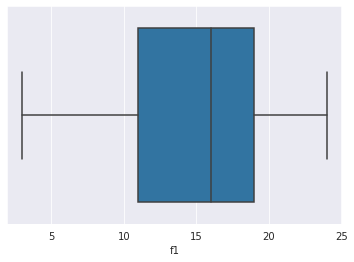

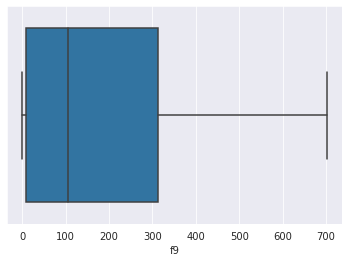

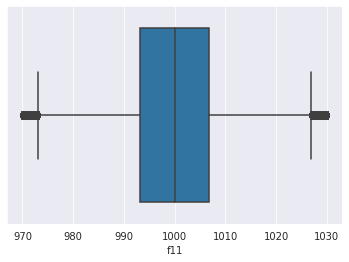

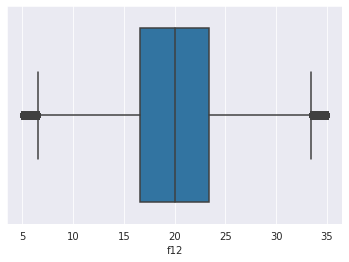

In [50]:
upd_feature_cols = ['f1', 'f9', 'f11', 'f12']

for cols in upd_feature_cols:
    plt.figure()
    sns.boxplot(x=upd_agersens_df[cols])

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



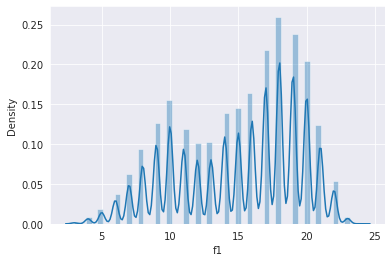

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



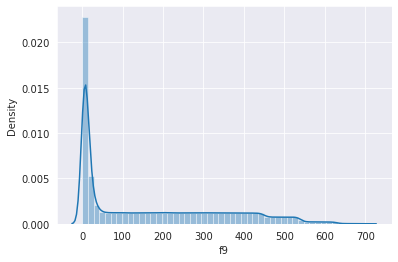

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



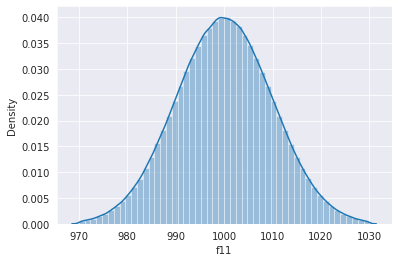

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



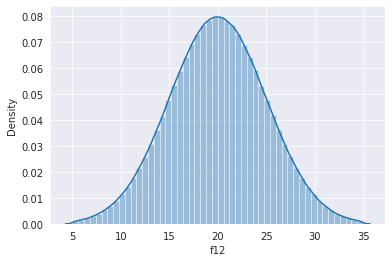

In [51]:
upd_feature_cols = ['f1', 'f9', 'f11', 'f12']

for cols in upd_feature_cols:
    sns.set_style('darkgrid')
    sns.distplot(upd_agersens_df[cols])

    plt.show()

##### creating a new column combining the latitude and longitude columns

(Might use it as a categorical column, will remove it otherwise)

In [52]:
upd_agersens_df['coordinates'] = upd_agersens_df['latitude'].astype(str) + ", " + upd_agersens_df['longitude'].astype(str)

In [53]:
upd_agersens_df.head()

,ID,target,latitude,longitude,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,coordinates
0,Location_1,1,-37.706060,145.126555,6,1.5,9.0,7.33,43.98,10.995,2,12,3.0,14.66,999.62,17.48,"-37.70606, 145.126555"
1,Location_2,1,-37.706120,145.126457,11,0.8,8.8,3.52,38.72,2.816,3,33,2.4,10.56,1000.17,22.59,"-37.70612, 145.126456667"
2,Location_3,1,-37.706122,145.126435,12,0.7,8.4,2.93,35.16,2.051,3,36,2.1,8.79,986.20,21.66,"-37.706121667, 145.12643500000001"
3,Location_4,1,-37.706123,145.126427,13,0.7,9.1,2.54,33.02,1.778,4,52,2.8,10.16,1011.47,13.72,"-37.706123333, 145.126426667"
4,Location_5,1,-37.706123,145.126423,13,0.7,9.1,2.29,29.77,1.603,4,52,2.8,9.16,995.29,9.19,"-37.706123333, 145.126423333"


In [54]:
len(upd_agersens_df)

3815118

In [55]:
len(upd_agersens_df['coordinates'].unique())

4431

### Feature Engineering

In [56]:
# creating a new dataframe and dropping the ID and coordinates column
full_upd_agersens_df = upd_agersens_df.drop(['ID', 'coordinates'], axis = 1)

In [57]:
full_upd_agersens_df.columns

Index(['target', 'latitude', 'longitude', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6',
       'f7', 'f8', 'f9', 'f10', 'f11', 'f12'],
      dtype='object')

#### Scaling certain columns using MinMax Scaler

Using MinMax Scaler as either I have removed outliers from them or there were none to begin with.

In [58]:
minmax_scaler = MinMaxScaler()

minmax_columns = ['f1', 'f7', 'f8', 'f9', 'f11', 'f12']

full_upd_agersens_df[minmax_columns] = minmax_scaler.fit_transform(full_upd_agersens_df[minmax_columns])

#### Scaling certain columns using Robust Scaler

Using Robust scaler as there were certain columns where removing rows with outliers can lead to losing out on a lot of `Non-Spurious` data, this will consider outliers during scaling

In [59]:
robust_scaler = RobustScaler()

robust_columns = ['f2', 'f3', 'f4', 'f5', 'f6', 'f10']

full_upd_agersens_df[robust_columns] = robust_scaler.fit_transform(full_upd_agersens_df[robust_columns])

In [60]:
full_upd_agersens_df.head()

,target,latitude,longitude,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,1,-37.706060,145.126555,0.142857,4.0,-1.318543,4.299363,2.404364,7.012516,0.00222,0.000556,0.004274,-0.332224,0.493669,0.416139
1,1,-37.706120,145.126457,0.380952,0.5,-1.518543,1.872611,2.021818,1.624506,0.00333,0.001529,0.003419,-0.348470,0.502832,0.586529
2,1,-37.706122,145.126435,0.428571,0.0,-1.918543,1.496815,1.762909,1.120553,0.00333,0.001669,0.002991,-0.355484,0.270077,0.555519
3,1,-37.706123,145.126427,0.476190,0.0,-1.218543,1.248408,1.607273,0.940711,0.00444,0.002410,0.003989,-0.350055,0.691103,0.290764
4,1,-37.706123,145.126423,0.476190,0.0,-1.218543,1.089172,1.370909,0.825428,0.00444,0.002410,0.003989,-0.354018,0.421526,0.139713


### Creating Training and Testing Dataset

Seperating the dataset into predictor columns (X) and target column (Y). Then split the records into 70% Training and 30% Testing datasets using `train_test_split` from sklearn

In [61]:
X = full_upd_agersens_df.drop(columns=['target'])
y = full_upd_agersens_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Running different models on the training data and then generating predictions based on the testing data. Generating metrics like `Accuracy`, `F1Score`, `Confusion Matrix` and the whole `Classification Report` to take a look at the results.

### Random Forest Classifier

In [62]:
# model first run with all the X variables
rfc_model = RandomForestClassifier(max_depth = 12, max_features = 'sqrt')

rfc_model.fit(X_train, y_train)

rfc_train_preds = rfc_model.predict(X_train)
rfc_test_preds = rfc_model.predict(X_test)


In [63]:
print('Train Accuracy Score: ', accuracy_score(y_train, rfc_train_preds))
print('Test Accuracy Score: ', accuracy_score(y_test, rfc_test_preds))
print('\n')
print('Train F1 Score: ', f1_score(y_train, rfc_train_preds))
print('Test F1 Score: ', f1_score(y_test, rfc_test_preds))

Train Accuracy Score:  0.9990867159293367
Test Accuracy Score:  0.9987444693744889


Train F1 Score:  0.9995395095691951
Test F1 Score:  0.9993668708218211


In [64]:
print('Train Confusion Matrix: \n', confusion_matrix(y_train, rfc_train_preds))
print('Test Confusion Matrix: \n', confusion_matrix(y_test, rfc_test_preds))

Train Confusion Matrix: 
 [[  21099    1736]
 [    703 2647044]]
Test Confusion Matrix: 
 [[   8978     896]
 [    541 1134121]]


In [65]:
print('Train Classification Report: \n', classification_report(y_train, rfc_train_preds))
print('Test Classification Report: \n', classification_report(y_test, rfc_test_preds))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95     22835
           1       1.00      1.00      1.00   2647747

    accuracy                           1.00   2670582
   macro avg       0.98      0.96      0.97   2670582
weighted avg       1.00      1.00      1.00   2670582

Test Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      9874
           1       1.00      1.00      1.00   1134662

    accuracy                           1.00   1144536
   macro avg       0.97      0.95      0.96   1144536
weighted avg       1.00      1.00      1.00   1144536



### XGBoost Classifier

In [66]:
# Instantiation
xgb = xg.XGBClassifier()

# Fitting the model
xgb.fit(X_train, y_train)
  
# Predict the model
xgb_train_preds = xgb.predict(X_train)
xgb_test_preds = xgb.predict(X_test)


/home/ml/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[04:40:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ml/.local/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [67]:
print('Train Accuracy Score: ', accuracy_score(y_train, xgb_train_preds))
print('Test Accuracy Score: ', accuracy_score(y_test, xgb_test_preds))
print('\n')
print('Train F1 Score: ', f1_score(y_train, xgb_train_preds))
print('Test F1 Score: ', f1_score(y_test, xgb_test_preds))

Train Accuracy Score:  0.9995270693803823
Test Accuracy Score:  0.9989148440940259


Train F1 Score:  0.9997615009690085
Test F1 Score:  0.9994527187802944


In [68]:
print('Train Confusion Matrix: \n', confusion_matrix(y_train, xgb_train_preds))
print('Test Confusion Matrix: \n', confusion_matrix(y_test, xgb_test_preds))

Train Confusion Matrix: 
 [[  22141     694]
 [    569 2647178]]
Test Confusion Matrix: 
 [[   9215     659]
 [    583 1134079]]


In [69]:
k = confusion_matrix(y_test, xgb_test_preds)
k[1][0]

583

In [70]:
print('Train Classification Report: \n', classification_report(y_train, xgb_train_preds))
print('Test Classification Report: \n', classification_report(y_test, xgb_test_preds))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     22835
           1       1.00      1.00      1.00   2647747

    accuracy                           1.00   2670582
   macro avg       0.99      0.98      0.99   2670582
weighted avg       1.00      1.00      1.00   2670582

Test Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      9874
           1       1.00      1.00      1.00   1134662

    accuracy                           1.00   1144536
   macro avg       0.97      0.97      0.97   1144536
weighted avg       1.00      1.00      1.00   1144536



### Neural Networks

In [71]:
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(len(X_train.columns),)))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

In [72]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1920      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


In [73]:
nn_model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [74]:
nn_model.fit(X_train, y_train, epochs=100, batch_size=10000, verbose=1)

Epoch 1/100
268/268 [==============================] - 1s 1ms/step - loss: 0.0402 - accuracy: 0.9919
Epoch 2/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.9922
Epoch 3/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.9923
Epoch 4/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9922
Epoch 5/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9922
Epoch 6/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9921
Epoch 7/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.9923
Epoch 8/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9922
Epoch 9/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9923
Epoch 10/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0226 - accura

In [75]:
# Predict the model
nn_train_preds = nn_model.predict_classes(X_train)
nn_test_preds = nn_model.predict_classes(X_test)

print('Train Accuracy Score: ', accuracy_score(y_train, nn_train_preds))
print('Test Accuracy Score: ', accuracy_score(y_test, nn_test_preds))
print('\n')
print('Train F1 Score: ', f1_score(y_train, nn_train_preds))
print('Test F1 Score: ', f1_score(y_test, nn_test_preds))


/home/ml/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

/home/ml/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Train Accuracy Score:  0.9918306196926363
Test Accuracy Score:  0.9916743553719586


Train F1 Score:  0.9958960570206732
Test F1 Score:  0.9958174826503878


In [76]:
print('Train Confusion Matrix: \n', confusion_matrix(y_train, nn_train_preds))
print('Test Confusion Matrix: \n', confusion_matrix(y_test, nn_test_preds))

Train Confusion Matrix: 
 [[   1620   21215]
 [    602 2647145]]
Test Confusion Matrix: 
 [[    625    9249]
 [    280 1134382]]


In [77]:
print('Train Classification Report: \n', classification_report(y_train, nn_train_preds))
print('Test Classification Report: \n', classification_report(y_test, nn_test_preds))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.07      0.13     22835
           1       0.99      1.00      1.00   2647747

    accuracy                           0.99   2670582
   macro avg       0.86      0.54      0.56   2670582
weighted avg       0.99      0.99      0.99   2670582

Test Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.06      0.12      9874
           1       0.99      1.00      1.00   1134662

    accuracy                           0.99   1144536
   macro avg       0.84      0.53      0.56   1144536
weighted avg       0.99      0.99      0.99   1144536



From the above experiments I can infer that without downsampling on imbalanced data, `Neural Networks` performs the worst, it does a good job at predicting True Negatives but does a very bad job at predicting True Positives.

Both `Random Forest Classifier` and `XGBoost Classifier` does a very good job at predicting both True Positives and True Negatives. `XGBoost Classifier` still outperforms `Random Forest Classifier`, but I still feel that it could have done a better job. 

So in the jupyter notebook named `agersens_data_modelling_with_downsampling.ipynb`, I have downsampled the data and then performed Classification on it. The results are much better, more details available in that notebook